# Experiment 10 - Non-parametric Locally Weighted Regression (NPLWR)

## Parametric vs Non-Parametric Learning Algorithms
Parametric — In a Parametric Algorithm, we have a fixed set of parameters such as theta that we try to find(the optimal value) while training the data. After we have found the optimal values for these parameters, we can put the data aside or erase it from the computer and just use the model with parameters to make predictions. Remember, the model is just a function.

Non-Parametric — In a Non-Parametric Algorithm, you always have to keep the data and the parameters in your computer memory to make predictions. And that’s why this type of algorithm may not be great if you have a really really massive dataset.

## Need for NPLW Regression
We specifically apply this regression technique when the data to fit is non-linear. In Linear Regression we would fit a straight line to this data but that won’t work here because the data is non-linear and our predictions would end up having large errors. We need to fit a curved line so that our error is minimized.

## Under the Hood
In Locally weighted linear regression, we give the model the `x` where we want to make the prediction, then the model gives all the `x(i)`’s around that `x` a higher weight close to one, and the rest of `x(i)`’s get a lower weight close to zero and then tries to fit a straight line to that weighted `x(i)`’s data.

This means that if want to make a prediction for the green point on the x-axis (see figure below), the model gives higher weight to the input data i.e. `x(i)`’s near or around the circle above the green point and all else `x(i)` get a weight close to zero, which results in the model fitting a straight line only to the data which is near or close to the circle. The same goes for the purple, yellow, and grey points on the x-axis.

## Calculating Error
In the loss function, it translates to error terms for the `x(i)`’s which are far from `x` being multiplied by almost zero and for the `x(i)`’s which are close to `x` get multiplied by almost 1. In short, it only sums over the error terms for the `x(i)`’s which are close to `x`.

## Implementation 

### Import Libraries

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Define the Parameters of the Model

In [43]:
# Define global variables
numberSamples = 500

# Lambda function to de-linearize input function
deLinearize = lambda X: np.cos(1.5 * np.pi * X) + np.cos(5 * np.pi * X)

# Define X and y
X = np.sort(np.random.rand(numberSamples)) * 2
y = deLinearize(X) + np.random.randn(numberSamples) * 0.1

X = X.reshape(X.shape[0], 1)
y = y.reshape(y.shape[0], 1)

# Define tau
tauList = np.arange(0, 0.1, step=0.01)

### Define a Function to Calculate the Weight Matrix

In [44]:
# Function to calculate weight matrix
def calculateWeightMatrix(point, X, tau):
    '''
    The parameters of this function are,
    tau --> bandwidth
    X --> Training data.
    point --> the x where we want to make the prediction.
    '''

    # m is the number of training examples.
    m = X.shape[0]

    # Initializing W as an identity matrix.
    w = np.mat(np.eye(m))

    # Calculating weights for all training examples [x(i)'s].
    for i in range(m):
        xi = X[i]
        d = (-2 * tau * tau)
        w[i, i] = np.exp(np.dot((xi - point), (xi - point).T) / d)

    return w

### Define a Function to Predict for a Point in the Input Vector

In [45]:
# Function to predict for a single point in the input vector
def predictSinglePoint(X, y, point, tau):
    # Calculating the weight matrix using the wm function we wrote earlier.
    w = calculateWeightMatrix(point, X, tau)

    # Calculating parameter theta using the formula.
    theta = np.linalg.pinv(X.T * (w * X)) * (X.T * (w * y))

    # Calculating predictions.
    pointPrediction = np.dot(point, theta)

    # Returning the theta and predictions
    return theta, pointPrediction

### Define a Function to Predict all Points for a Single Value of Tau

In [46]:
# Function to predict for a single tau value for all the points in the input vector
def predictSingleTau(XTest, tau):
    # Empty list for storing predictions.
    predictionForSingleTau = []

    # Predicting for all numberPredictions values and storing them in predictions.
    for point in XTest:
        _, pointPrediction = predictSinglePoint(X, y, point, tau)
        predictionForSingleTau.append(pointPrediction)

    # Reshaping predictions
    predictionForSingleTau = np.array(predictionForSingleTau).reshape(numberSamples, 1)

    return predictionForSingleTau

### Define Test Data

In [47]:
# Define testing data to predict
XTest = np.sort(np.random.rand(numberSamples)) * 2
XTest = np.array(XTest).reshape(numberSamples, 1)


### Plot Predictions for Multiple Tau Values

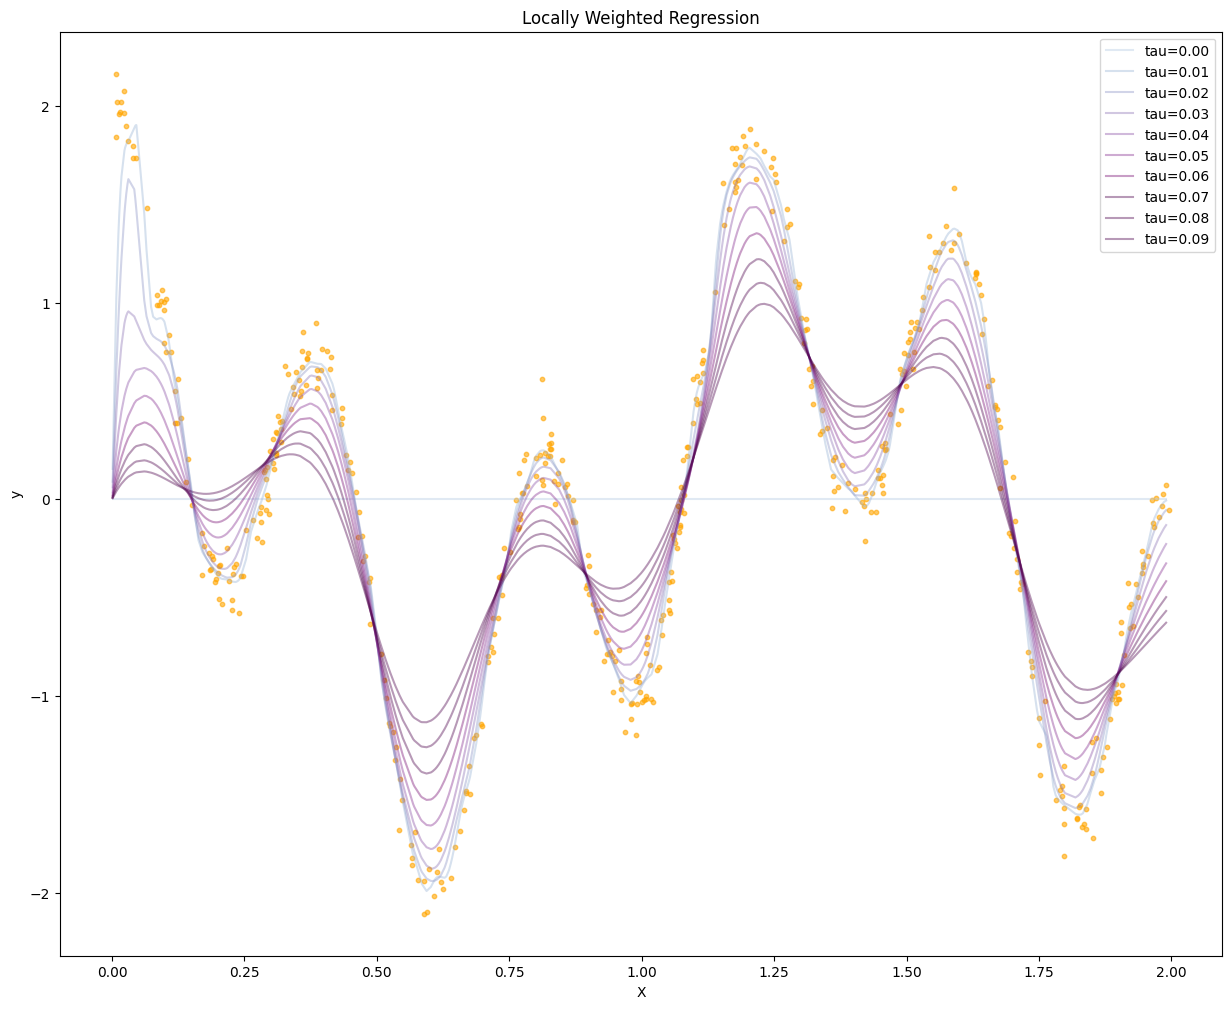

In [52]:
# Plot the training data
plt.figure(figsize=(15, 12))
# plt.figure(figsize=(20, 15), dpi=80)

plt.scatter(X, y, s=10, c='orange', marker='o', alpha=0.6)
# plt.plot(X, y, c='orange', marker='o', alpha=0.6)

# Lower value means that the higher tau values are darker in the gradient
colorDelta = 0.3

# Predict for each tau value and plot
for i, tau in enumerate(tauList):
    prediction = predictSingleTau(XTest, tau)
    color = plt.cm.BuPu(colorDelta + (i / len(tauList)))
    plt.plot(XTest, prediction, color=color, alpha=0.4, label=f'tau={tau:.2f}')
    
# Set plot attributes
plt.title("Locally Weighted Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
